Install necessary Python libraries

In [92]:
!pip install pandas numpy scikit-learn matplotlib seaborn

Load the dataset into a Jupyter notebook or any Python environment

In [64]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preview the training data
print(train_data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Exploratory Data Analysis (EDA)

Check for missing values

In [66]:
missing_values = train_data.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


Visualize relationships: Use visualizations to explore how different features affect house prices.

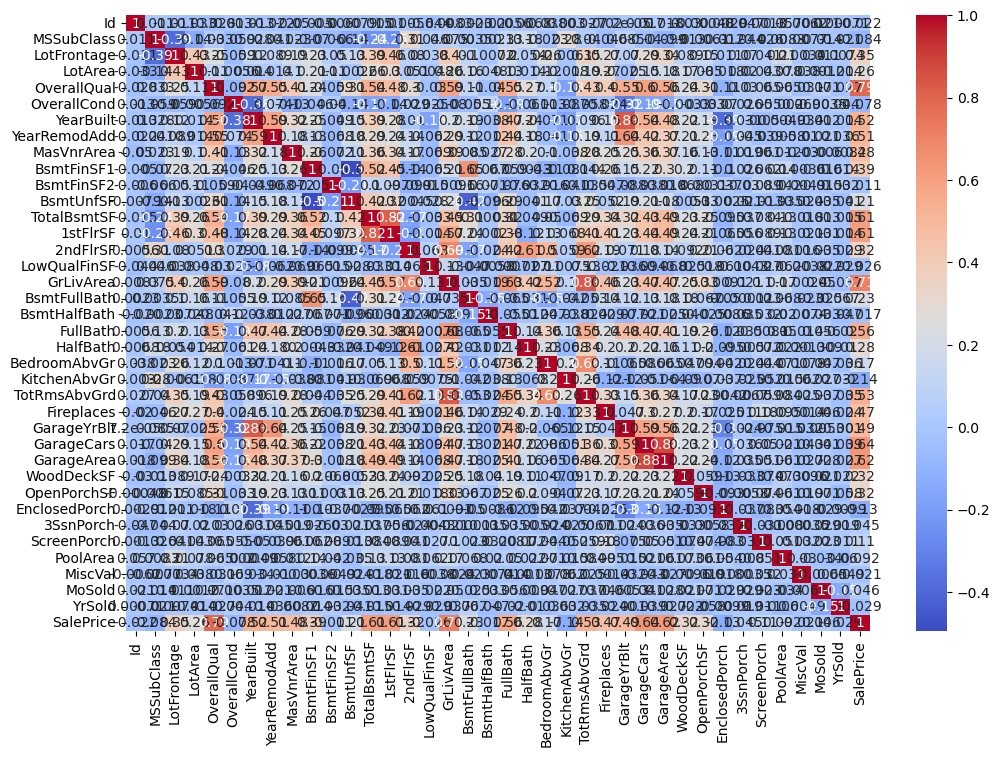

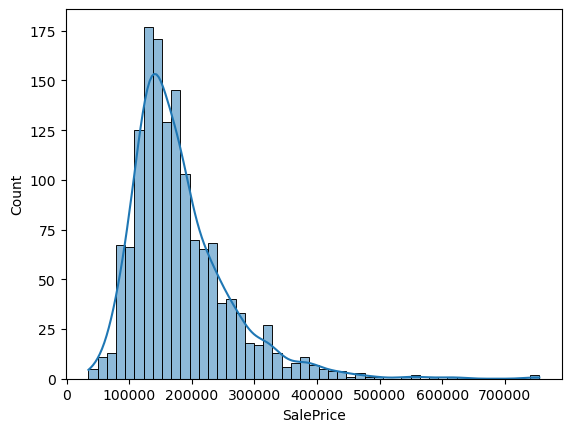

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numeric using pd.get_dummies() or drop them
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix with only numeric columns
corr = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Distribution of house prices
sns.histplot(train_data['SalePrice'], kde=True)
plt.show()


Data Preprocessing

Handle missing values: You can drop features with many missing values or fill them in.

In [69]:
# Drop columns with many missing values or not important
train_data = train_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

# Fill missing values for numerical columns
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())

# Fill missing values for categorical columns
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])


Encode categorical features: Convert categorical variables to numeric using one-hot encoding or label encoding.

In [70]:
train_data = pd.get_dummies(train_data)


Feature Engineering

Create new features or transform existing ones to improve the model's performance

In [71]:
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']


Split the data into features (X) and target variable (y)

In [76]:
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Use a regression model like Linear Regression, Decision Tree, or Random Forest to train the model.

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')


RMSE: 29567.54242454252


C:\Users\kshit\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


You can use GridSearchCV to tune hyperparameters of your model for better performance.

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
print(f'Best RMSE: {rmse_best}')

Best RMSE: 30158.135102747947


C:\Users\kshit\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:
# Get the features used in training
train_columns = set(train_data.columns)

# Add missing columns in the test data with default value 0
for column in train_columns:
    if column not in test_data.columns:
        test_data[column] = 0

# Remove any extra columns from the test data that were not present in training data
test_data = test_data[train_data.columns.drop('SalePrice')]


Once you're satisfied with the model’s performance, make predictions on the actual test dataset (test.csv) and submit the results.

In [111]:
test_data.loc[:, 'TotalSF'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']
test_data = pd.get_dummies(test_data)
predictions = model.predict(test_data)


Prepare your submission file

In [90]:
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': predictions
})
submission.to_csv('submission.csv', index=False)
